In [5]:
import os
import numpy as np
import dill
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# Compare over number of trajectories

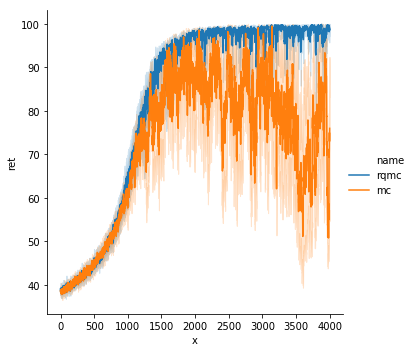

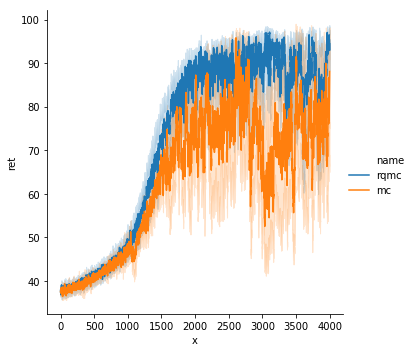

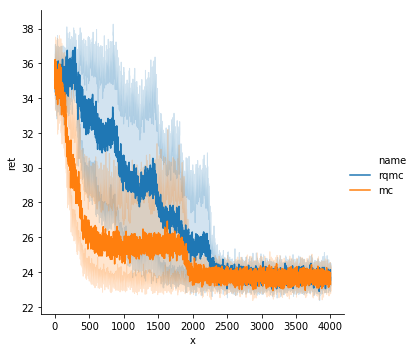

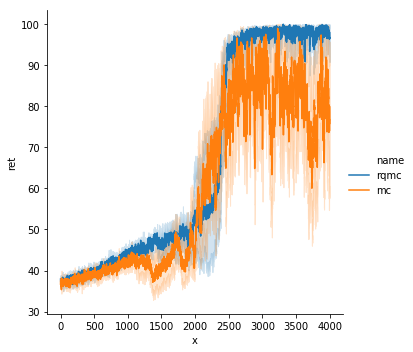

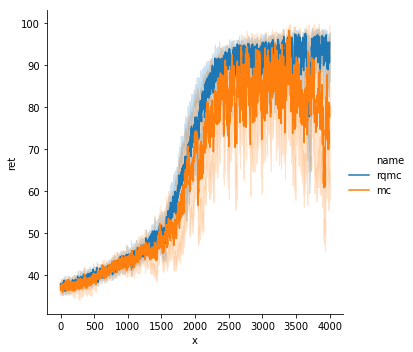

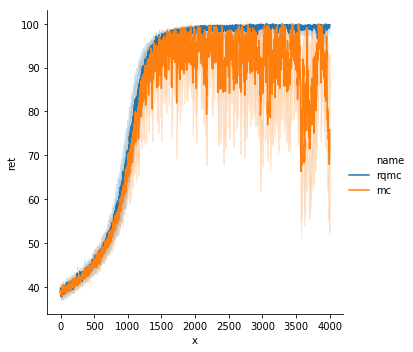

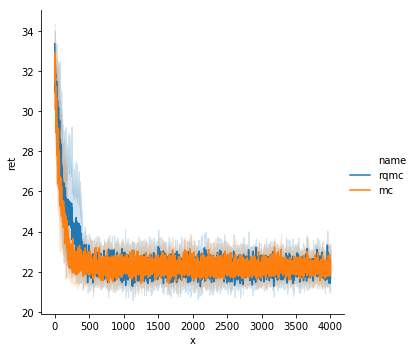

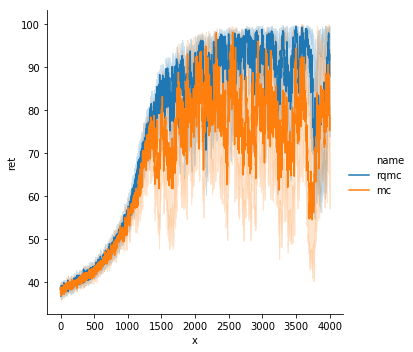

In [13]:
exp_name = 'search_vpg_trajs'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)

for fn in input_dir.iterdir():
    with open(fn, 'rb') as f:
        results = dill.load(f)
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'ret': val[:4000],
                    'x': np.arange(len(val))[:4000]
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='ret', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

# Generate all plots for reinforcement learning on cartpole

ploting data/search_vpg/2000-32-32
ploting data/search_vpg/500-8
ploting data/search_vpg/1500-16
ploting data/search_vpg/1500-8
ploting data/search_vpg/1000-16-8
ploting data/search_vpg/1500-32-32
ploting data/search_vpg/500-16-8
ploting data/search_vpg/2000-8
ploting data/search_vpg/1500-16-16
ploting data/search_vpg/1000-32-32
ploting data/search_vpg/500-16-16
ploting data/search_vpg/500-32-32
ploting data/search_vpg/1000-8
ploting data/search_vpg/2000-16
ploting data/search_vpg/500-32-16
ploting data/search_vpg/1000-16-16


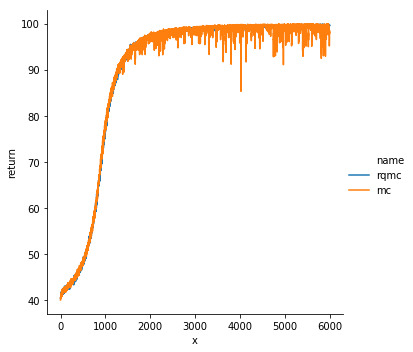

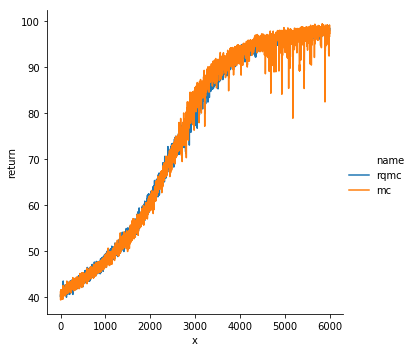

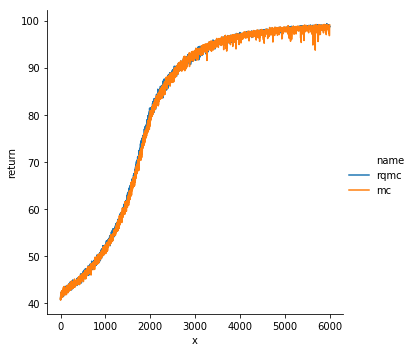

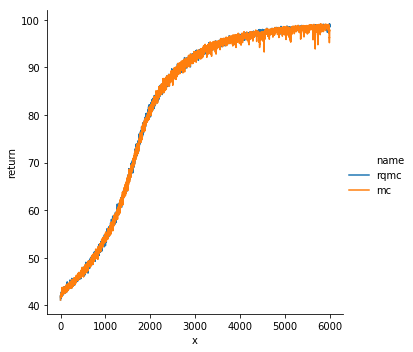

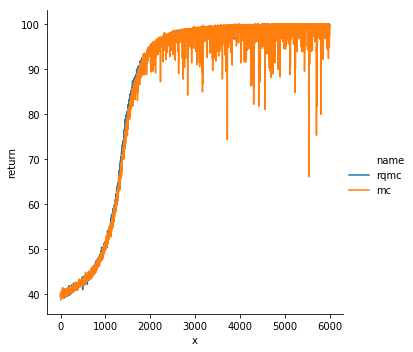

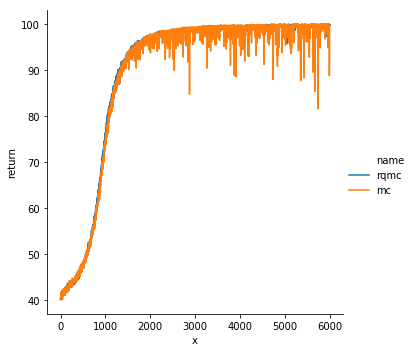

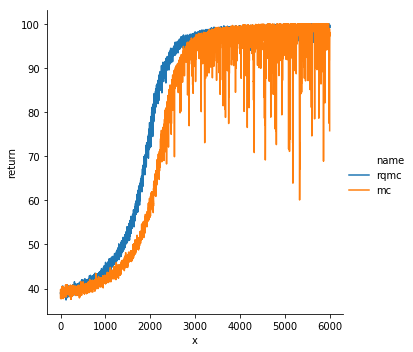

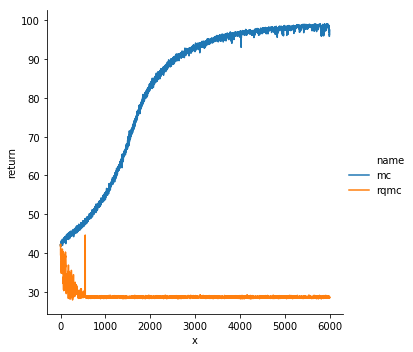

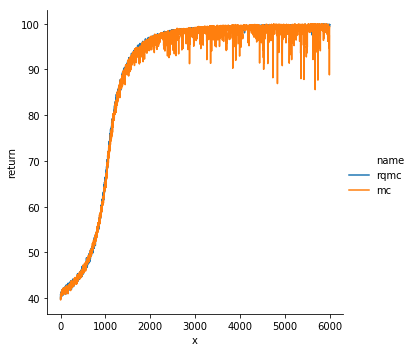

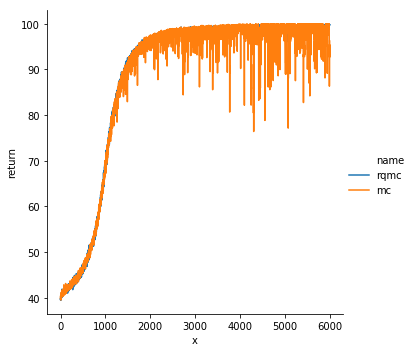

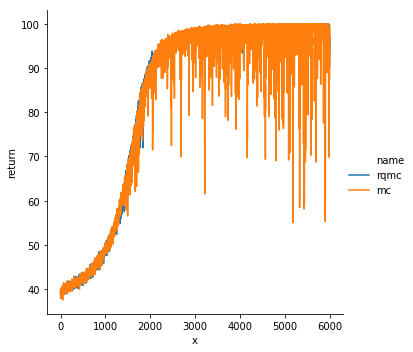

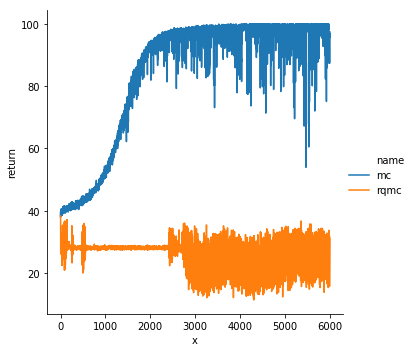

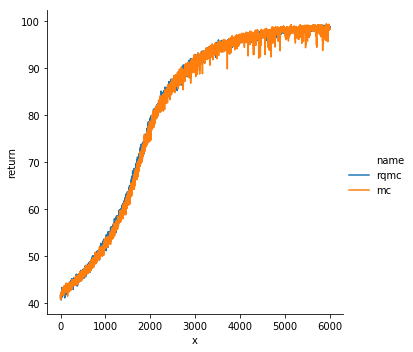

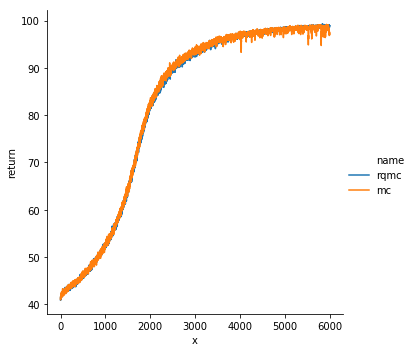

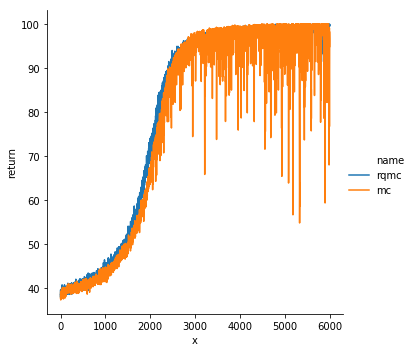

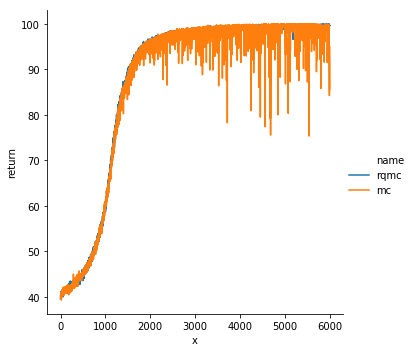

In [6]:
exp_name = 'search_vpg'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)
for fn in input_dir.iterdir():
    with open(fn, 'r') as f:
        print('ploting {}'.format(fn))
        info = json.load(f)
        data = pd.concat([
            pd.DataFrame({
                'name': name,
                'return': res,
                'x': np.arange(len(res))
            })
            for name, res in info.items()
        ])
        plot = sns.relplot(x='x', y='return', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

# Generate all plots for network search

In [ ]:
exp_name = 'search_network'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name + '_std')
output_dir.mkdir(parents=True, exist_ok=True)
for fn in input_dir.iterdir():
    with open(fn, 'rb') as f:
        print('ploting {}'.format(fn))
        full_results = dill.load(f)
        results = [res[0] for res in full_results if len(res[1]['out']) == 0]
        if len(results) == 0:
            results = [res[0] for res in full_results if len(res[1]['out']) == 1] # only mc is out
        if len(results) == 0: continue # nothing works
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'cost': -val,
                    'x': np.arange(len(val))
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

ploting data/search_network/300-0.0005-5-1.0
ploting data/search_network/150-0.0005-15-5.0
ploting data/search_network/100-0.0005-15-1.0
ploting data/search_network/200-0.0005-5-5.0
ploting data/search_network/300-0.001-5-1.0
ploting data/search_network/150-0.001-15-3.0
ploting data/search_network/300-0.001-10-5.0
ploting data/search_network/60-0.001-15-3.0
ploting data/search_network/150-0.001-10-5.0
ploting data/search_network/60-0.0005-10-1.0
ploting data/search_network/150-0.001-5-5.0
ploting data/search_network/150-0.0005-10-3.0
ploting data/search_network/200-0.001-5-5.0
ploting data/search_network/60-0.001-10-3.0
ploting data/search_network/150-0.001-10-3.0
ploting data/search_network/200-0.0005-15-3.0
ploting data/search_network/100-0.001-15-1.0
ploting data/search_network/100-0.001-10-1.0
ploting data/search_network/150-0.0005-5-3.0
ploting data/search_network/200-0.001-15-3.0
ploting data/search_network/100-0.0005-5-5.0
ploting data/search_network/200-0.0001-15-5.0


# Compare Learning

In [24]:
with open('data/search_network/200-0.0005-15-5.0', 'rb') as f:
    full_results = dill.load(f)
    print('num of results:', len(full_results))
    print('num of outs:')
    print('mc:', len([res for res in full_results if 'mc' in res[1]['out']]))
    print('rqmc:', len([res for res in full_results if 'rqmc' in res[1]['out']]))
    print('full:', len([res for res in full_results if 'full' in res[1]['out']]))
    print('optimal:', len([res for res in full_results if 'optimal' in res[1]['out']]))
    results = [res[0] for res in full_results if len(res[1]['out']) == 0]
    print('number of learning results:', len(results))
    if len(results) == 0:
        results = [res[0] for res in full_results if len(res[1]['out']) == 1] # only mc is out
        print('number of learning results:', len(results))

num of results: 21
num of outs:
mc: 11
rqmc: 0
full: 0
optimal: 0
{'task': 'learn', 'env': 'custom', 'xu_dim': (20, 12), 'init_scale': 5.0, 'PQ_kappa': 3.0, 'AB_norm': 1.0, 'H': 15, 'noise': 0.0, 'n_trajs': 200, 'n_iters': 300, 'lr': 0.0005, 'init_policy': 'mlp', 'seed': 0, 'show_fig': False, 'save_fig': None, 'mode': 'collect', 'n_seeds': 10, 'max_seed': 30, 'n_workers': 8, 'save_fn': None, 'out': set()}


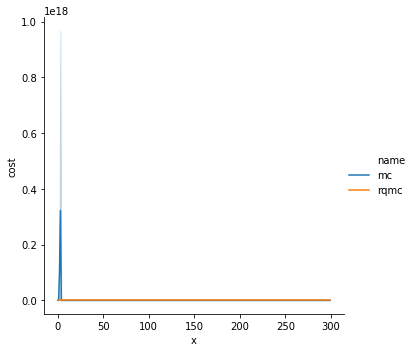

In [21]:
data = pd.concat([
    pd.concat([
        pd.DataFrame({
            'name': name,
            'cost': -val,
            'x': np.arange(len(val))
        })
        for name, val in res.items() if name != 'optimal'
    ])
    for res in results
])


# mc_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'mc',
#          'return': results[i][0][:x_lim],
#          'x': np.arange(len(results[i][0][:x_lim]))}) for i in range(len(results))
# ])

# rqmc_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'rqmc',
#          'return': results[i][1][:x_lim],
#          'x': np.arange(len(results[i][1][:x_lim]))}) for i in range(len(results))
# ])

# full_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'full',
#          'return': results[i][2][:x_lim],
#          'x': np.arange(len(results[i][2][:x_lim]))}) for i in range(len(results))
# ])

# optimal_data = pd.concat([
#     pd.DataFrame(
#         {'name': 'optimal',
#          'return': results[i][3][:x_lim],
#          'x': np.arange(len(results[i][3][:x_lim]))}) for i in range(len(results))
# ])

#data = pd.concat([mc_data, rqmc_data, full_data, optimal_data])
plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
plot.set(ylim=(0, 400))

# Compare Gradident

In [5]:
with open('data/compare_grad-10-100000', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])]
    print(len(results))
    print('rqmc wins in {}/{}'.format(np.sum([res[0][-1] > res[1][-1] for res in results]), len(results)))

200
rqmc wins in 200/200


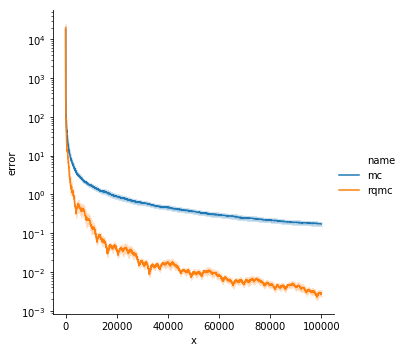

In [7]:
used_results = results[:50]

mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': used_results[i][0],
         'x': np.arange(len(used_results[i][0]))}) for i in range(len(used_results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': used_results[i][1],
         'x': np.arange(len(used_results[i][1]))}) for i in range(len(used_results))
])

data = pd.concat([mc_data, rqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

# Comparing over seeds (Return)

In [12]:
# load data
with open('comparing_over_seeds/200_seeds_2500_trajs.pkl', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])] # cannot use res[1][-1] == np.nan
    print(len(results))

FileNotFoundError: [Errno 2] No such file or directory: 'comparing_over_noises/0.0.pkl'

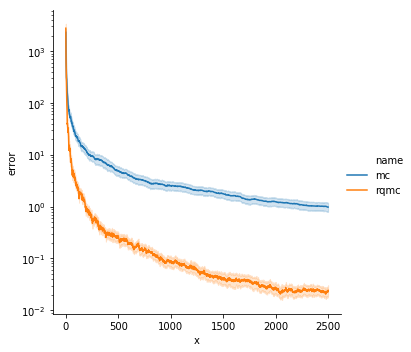

In [44]:
mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': results[i][0],
         'x': np.arange(len(results[i][0]))}) for i in range(len(results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': results[i][1],
         'x': np.arange(len(results[i][1]))}) for i in range(len(results))
])

data = pd.concat([mc_data, rqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

# One seed

In [4]:
#with open('one_seed/H-1.num_traj-2500.0.pkl', 'rb') as f:
#with open('one_seed/compare_0_100k.pkl', 'rb') as f:
with open('one_seed/H-5.num_traj-30000.1.pkl', 'rb') as f:
    results = dill.load(f)

mc_data = pd.DataFrame({
    'name': 'mc',
    'error': results['mc_errors'],
    'x': np.arange(len(results['mc_errors']))
})
rqmc_data = pd.DataFrame({
    'name': 'rqmc',
    'error': results['rqmc_errors'],
    'x': np.arange(len(results['rqmc_errors']))
})
data = pd.concat([mc_data, rqmc_data])

[[ 2.50000000e-01 -1.29651459e-17 -2.55744868e-17  1.36398873e-17
   2.54800645e-17]
 [-1.29651459e-17  2.50000000e-01 -4.84018955e-19 -2.13918922e-17
  -5.13255094e-18]
 [-2.55744868e-17 -4.84018955e-19  2.50000000e-01 -4.31612115e-18
   6.75873130e-18]
 [ 1.36398873e-17 -2.13918922e-17 -4.31612115e-18  2.50000000e-01
  -1.33592116e-17]
 [ 2.54800645e-17 -5.13255094e-18  6.75873130e-18 -1.33592116e-17
   2.50000000e-01]]


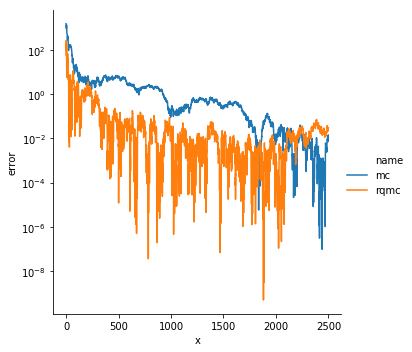

In [11]:
#plot = sns.relplot(x='x', y='error', hue='name', kind='line', data=data)
#plot.set(yscale='log')
from main import compare_samples

data = compare_samples(50, 2500, noise_scale=0.5, show_fig=True)

# Debug

In [11]:
import torch
from torch.optim import SGD

model = torch.nn.Linear(10, 10)
optimizer = SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

model.bias.requires_grad = False

for name, param in model.named_parameters():
    print(name, param)

x = torch.randn(5, 10)
g = torch.randn(5, 10)

loss = torch.nn.functional.mse_loss(x, g)

optimizer.zero_grad()
loss.backward()
optimizer.step()

for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[-0.1934, -0.2758, -0.1425, -0.1616, -0.3068, -0.0743,  0.2823,  0.1410,
          0.0495,  0.2070],
        [ 0.1081, -0.0497, -0.0402,  0.1652, -0.1893, -0.0879,  0.1987, -0.0668,
          0.0091,  0.2850],
        [-0.0523, -0.0862,  0.1250, -0.2178,  0.0176,  0.2996,  0.0648,  0.0271,
          0.0990, -0.1839],
        [ 0.1761, -0.2515,  0.2376,  0.0828, -0.0556,  0.2213,  0.2378,  0.2849,
          0.1870, -0.0220],
        [ 0.1420, -0.2498,  0.1630,  0.0941,  0.2684,  0.1991, -0.1635,  0.1753,
          0.2791,  0.1415],
        [ 0.0059, -0.2648,  0.2324,  0.0913, -0.0097,  0.0066,  0.0373,  0.0405,
         -0.1373, -0.0539],
        [ 0.2882,  0.0784,  0.0264, -0.1116,  0.2229, -0.1447, -0.1129, -0.0699,
          0.2869,  0.0132],
        [-0.2146,  0.1866, -0.1010,  0.0016, -0.1902, -0.0917, -0.1621,  0.0455,
          0.2752, -0.0336],
        [ 0.2609, -0.3011,  0.3098, -0.0103,  0.0185,  0.1859, -0.2402, -0.2952,
         -0.1301, 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [29]:
import torch
import numpy as np

a = torch.Tensor([0, 1, 2, -np.inf])
print(a == float('-inf'))

tensor([0, 0, 0, 1], dtype=torch.uint8)
